In [1]:
# Author: Chun-Yi Chen

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 

In [5]:
books = pd.read_csv("D:/user/Documents/WebMining/data/Clean book data.csv")

In [74]:
books.head()

,Unnamed: 0,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher_x,...,PagesNumber,Book-Title,Book-Author,Year-Of-Publication,Publisher_y,Image-URL-S,Image-URL-M,Image-URL-L,Genre,Genre_user_amount
0,0,2,Harry Potter and the Order of the Phoenix (Har...,1:12455,870,4:604283,total:2358637,1,9,Scholastic Inc.,...,NaN,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2004,Scholastic Paperbacks,http://images.amazon.com/images/P/0439358078.0...,http://images.amazon.com/images/P/0439358078.0...,http://images.amazon.com/images/P/0439358078.0...,Fantasy|Young Adult|Fiction|Fantasy|Magic|Chil...,"53,478|16,460|15,017|4,162|3,033|2,212|2,071|2..."
1,1,4,Harry Potter and the Chamber of Secrets (Harry...,1:11896,352,4:706082,total:2560657,1,11,Scholastic,...,NaN,Harry Potter and the Chamber of Secrets (Harry...,J. K. Rowling,2003,Arthur A. Levine Books,http://images.amazon.com/images/P/0439554896.0...,http://images.amazon.com/images/P/0439554896.0...,http://images.amazon.com/images/P/0439554896.0...,Fantasy|Fiction|Young Adult|Fantasy|Magic|Chil...,"58,010|16,758|16,408|4,587|3,893|3,098|2,525|2..."
2,3,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,1:3443,815,4:75683,total:274268,30,4,Del Rey Books,...,NaN,The Ultimate Hitchhiker's Guide to the Galaxy,DOUGLAS ADAMS,2002,Del Rey,http://images.amazon.com/images/P/0345453743.0...,http://images.amazon.com/images/P/0345453743.0...,http://images.amazon.com/images/P/0345453743.0...,Science Fiction|Fiction|Humor|Fantasy|Classics...,"3,417|2,792|1,477|1,160|819|474|416|182|179|106|"
3,5,21,A Short History of Nearly Everything,1:5140,544,4:94040,total:276166,14,9,Broadway Books,...,NaN,A Short History of Nearly Everything,BILL BRYSON,2004,Broadway,http://images.amazon.com/images/P/076790818X.0...,http://images.amazon.com/images/P/076790818X.0...,http://images.amazon.com/images/P/076790818X.0...,Nonfiction|Science|History|Audiobook|Humor|Sci...,"9,425|7,061|5,666|655|408|275|269|251|211|189|"
4,7,24,In a Sunburned Country,1:987,335,4:34941,total:85287,15,5,Broadway Books,...,NaN,In a Sunburned Country,Bill Bryson,2001,Broadway Books,http://images.amazon.com/images/P/0767903862.0...,http://images.amazon.com/images/P/0767903862.0...,http://images.amazon.com/images/P/0767903862.0...,Travel|Nonfiction|Humor|Cultural|Australia|Aut...,"3,123|2,666|723|591|365|216|184|129|99|82|"


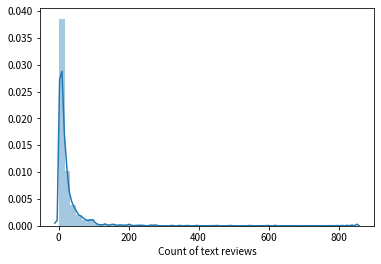

In [22]:
books_Genre = pd.DataFrame(books.Genre.str.split("|",expand=True))
Genre_count = books_Genre.groupby(by = 1).count().iloc[1:,:]

In [46]:
filter_count = Genre_count[Genre_count>30].dropna().sort_values(by = 0)
print(filter_count.shape)

(32, 10)


In [81]:
file_path = os.path.abspath(os.path.curdir)
results_dir = os.path.join(file_path, 'img/')

In [96]:
def plot_barh(data,xlabel,ylabel,title,savename,xtickfont = 10, ytickfont = 10,figsize = (10,6)):
    file_path = os.path.abspath(os.path.curdir)
    results_dir = os.path.join(file_path, 'img/')
    if not os.path.isdir(results_dir):
        os.makedirs(results_dir)

    
    plt.figure(figsize=figsize)
    plt.barh(width = data.iloc[:,0], y = data.index)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.yticks(fontsize=ytickfont)
    plt.title(title, fontsize = 14)
    plt.tight_layout()
    plt.savefig(results_dir + savename)

In [95]:
def plot_dist(data,xlabel,ylabel,title,savename,xtickfont = 10, ytickfont = 10,figsize = (10,6)):
    file_path = os.path.abspath(os.path.curdir)
    results_dir = os.path.join(file_path, 'img/')
    if not os.path.isdir(results_dir):
        os.makedirs(results_dir)

    
    plt.figure(figsize=figsize)
    sns.distplot(data)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.yticks(fontsize=ytickfont)
    plt.title(title, fontsize = 14)
    plt.tight_layout()
    plt.savefig(results_dir + savename)

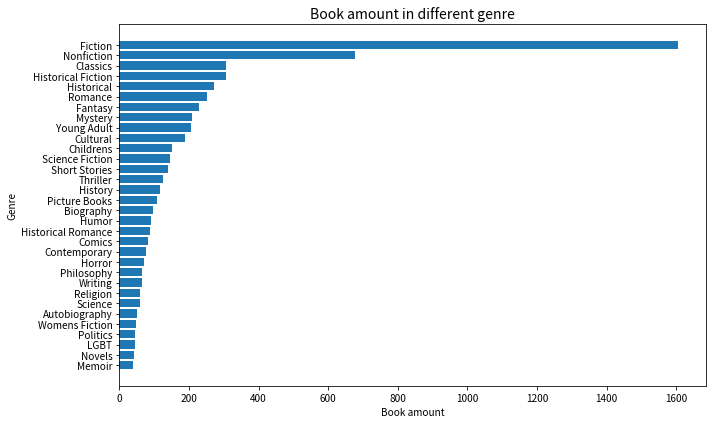

In [73]:
plot_barh(filter_count,"Book amount","Genre","Book amount in different genre","Book amount in different genre.png")

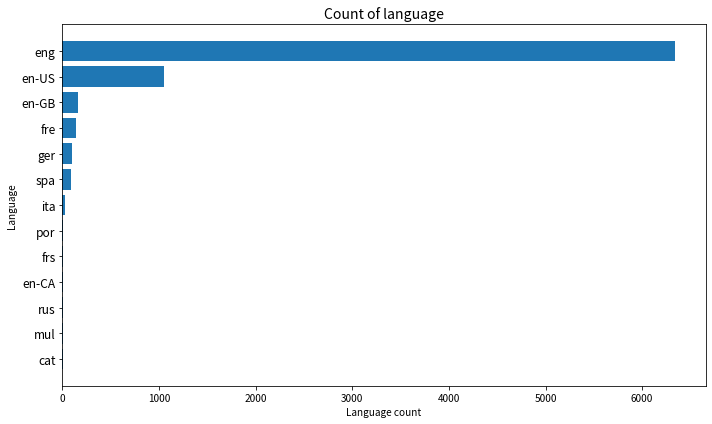

In [83]:
plot_barh(books.groupby(by = "Language").count().sort_values(by = "Id"),"Language count","Language","Count of language","Count of language.png",ytickfont=12)

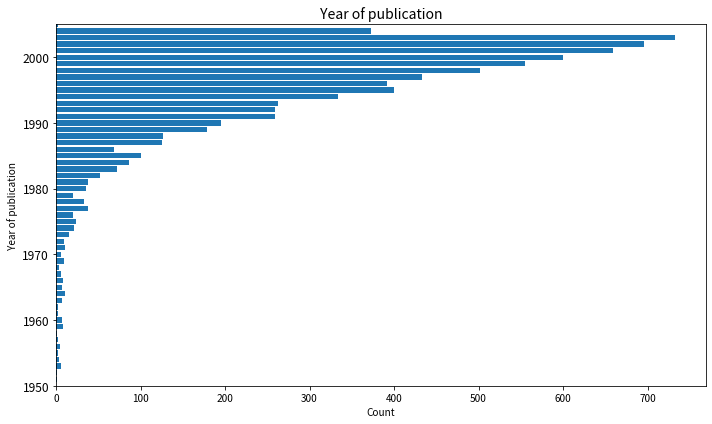

In [84]:
plot_barh(books.groupby(by = "Year-Of-Publication").count().sort_values(by = "Id"),"Count","Year of publication","Year of publication","Count of Year of publication.png",ytickfont=12)
plt.ylim(1950,2005)
plt.tight_layout()
plt.savefig(results_dir + "Count of Year of publication.png")

(-10, 400)

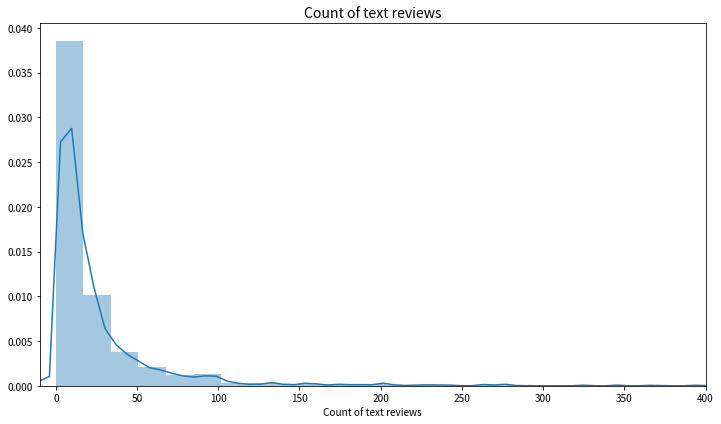

In [100]:
plot_dist(books.loc[:,"Count of text reviews"].dropna(),"Count of text reviews","","Count of text reviews","Count of text reviews.png",xtickfont=12)
plt.xlim(-10,400)